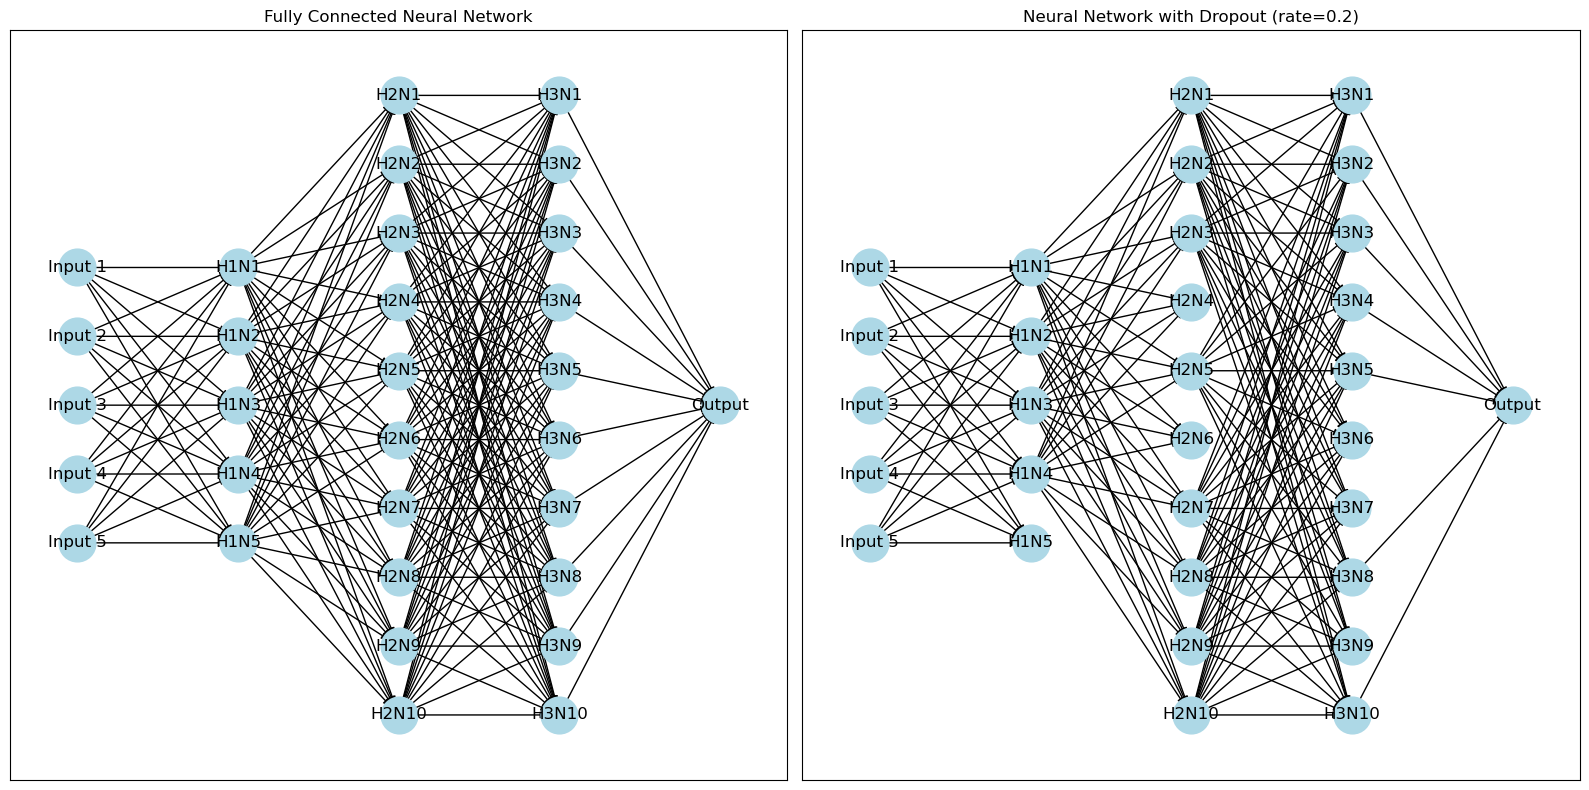

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(ax, layer_sizes, dropout=None):
    G = nx.DiGraph()
    
    # Generate nodes
    layers = len(layer_sizes)
    nodes = []
    for i, size in enumerate(layer_sizes):
        for j in range(size):
            # Center the nodes vertically
            nodes.append((i, j))
            G.add_node((i, j), pos=(i, (layer_sizes[i] - 1) / 2 - j))

    # Generate edges
    for i in range(layers - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                if dropout and i in dropout and (i, j) in dropout[i]:
                    continue
                G.add_edge((i, j), (i + 1, k))

    # Draw the nodes
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=700, node_color='lightblue')
    
    # Draw the edges
    nx.draw_networkx_edges(G, pos, ax=ax, arrows=True)

    # Annotate the nodes with layer information
    labels = {}
    for i, size in enumerate(layer_sizes):
        for j in range(size):
            if i == 0:
                labels[(i, j)] = f'Input {j+1}'
            elif i == layers - 1:
                labels[(i, j)] = f'Output'
            else:
                labels[(i, j)] = f'H{i}N{j+1}'
    
    nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=12)

# Layer sizes
layer_sizes = [5, 5, 10, 10, 1]

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Full connection
axs[0].set_title('Fully Connected Neural Network')
draw_neural_network(axs[0], layer_sizes)

# Dropout
dropout_rate = 0.2
dropout_layers = {
    i: [(i, j) for j in range(layer_sizes[i]) if np.random.rand() < dropout_rate]
    for i in range(1, len(layer_sizes) - 1)
}

axs[1].set_title(f'Neural Network with Dropout (rate={dropout_rate})')
draw_neural_network(axs[1], layer_sizes, dropout=dropout_layers)

# Show the plot
plt.tight_layout()
plt.show()